<a href="https://colab.research.google.com/github/tarapun30ka/ai/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 1 Задача регрессии

## Задание
Решите пожалуйста следующие задачи.

1. Примените следующие типы регрессий для датасета представленного по
[ссылке](https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view?usp=share_link).
- Линейная регрессия
- LASSO регрессия
- Ridge регрессия
- ElasticNet регрессия
- Polynom регрессия (для степени полинома 2)
- Polynom регрессия (для степени полинома 5)
- Polynom регрессия (для степени полинома 10)

Постройте модель для атрибутов `X = {SkinThickness, BMI}` и `Y = {Insulin}`.  
**Укажите `score` (r2_score) моделей. Найдите метрики MAE, MSE.**


## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown --fuzzy 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view?usp=share_link'

Downloading...
From: https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 49.4MB/s]


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##  О датасете
[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек (NIDDK). Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

Наборы данных состоят из нескольких переменных медицинских предикторов и одной целевой переменной `Outcome`. Переменные-предикторы включают количество беременностей, которые были у пациентки, её индекс массы тела `BMI`, уровень инсулина, возраст и так далее. Всего в датасете 9 переменных:
- `Pregnancies` - количество беременностей;
- `Glucose` - концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе;
- `BloodPressure` - диастолическое артериальное давление (мм рт. ст.);
- `SkinThickness` - толщина кожной складки трицепса (мм);
- `Insulin` - 2-часовой сывороточный инсулин (мкЕд/мл);
- `BMI` - Индекс массы тела (вес в кг/(рост в м)^2);
- `DiabetesPedigreeFunction` - функция оценки вероятности диабета на основе семейного анамнеза;
- `Age` - возраст (лет);
- `Outcome` - целевая переменная (0 или 1) 268 из 768 — 1 (больны), остальные — 0 (здоровы).



In [ ]:
df.info()
# нет пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# вроде как данные все в норм рефернсах

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df[['SkinThickness', 'BMI', 'Insulin']].corr()

,SkinThickness,BMI,Insulin
SkinThickness,1.000000,0.392573,0.436783
BMI,0.392573,1.000000,0.197859
Insulin,0.436783,0.197859,1.000000


Хотела посмотреть, почему такое качество не очень - много нулевых значений

  0%:     0.00
  1%:     0.00
  5%:     0.00
 10%:     0.00
 25%:     0.00
 50%:    30.50
 75%:   127.25
 90%:   210.00
 95%:   293.00
 99%:   519.90
100%:   846.00


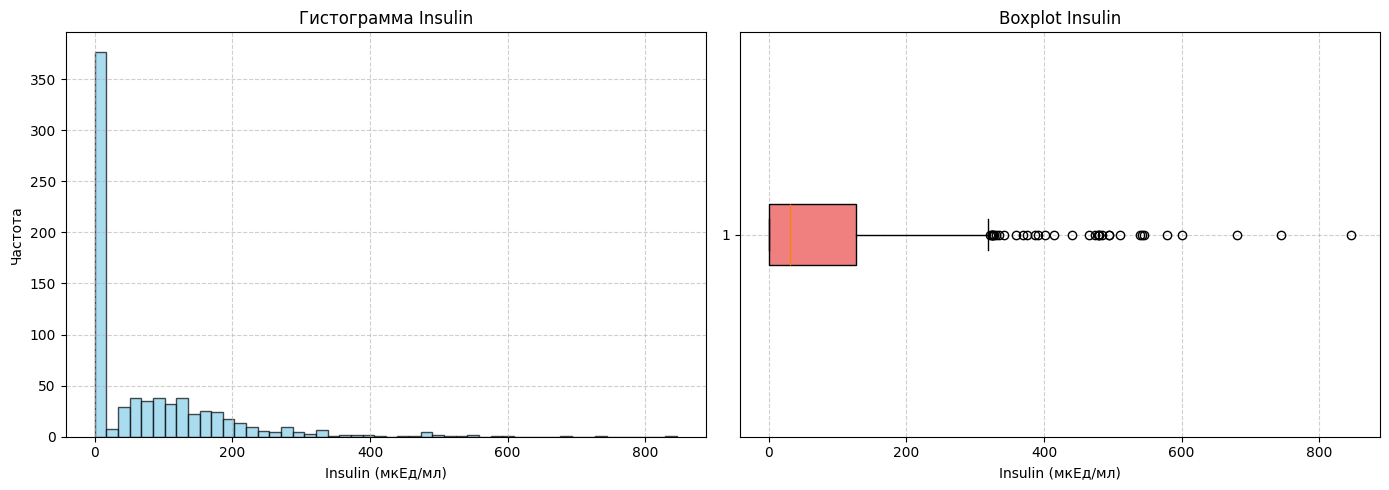


Количество нулевых значений в Insulin: 374 из 768 (48.7%)


In [ ]:
import matplotlib.pyplot as plt

insulin = df['Insulin']

# Перцентили
percentiles = [0, 1, 5, 10, 25, 50, 75, 90, 95, 99, 100]
perc_vals = insulin.quantile([p/100 for p in percentiles])

for p, v in zip(percentiles, perc_vals):
    print(f"{p:3d}%: {v:8.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(insulin, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Гистограмма Insulin')
axes[0].set_xlabel('Insulin (мкЕд/мл)')
axes[0].set_ylabel('Частота')
axes[0].grid(True, linestyle='--', alpha=0.6)

axes[1].boxplot(insulin, vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
axes[1].set_title('Boxplot Insulin')
axes[1].set_xlabel('Insulin (мкЕд/мл)')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

num_zeros = (insulin == 0).sum()
total = len(insulin)
print(f"\nКоличество нулевых значений в Insulin: {num_zeros} из {total} ({num_zeros/total*100:.1f}%)")

Пробовала заменить на медианные значение, но результат не улучшился

In [ ]:
# insulin_median = df[df['Insulin'] != 0]['Insulin'].median()
# df['Insulin'] = df['Insulin'].replace(0, insulin_median)

In [ ]:
# skin_median = df[df['SkinThickness'] != 0]['SkinThickness'].median()
# df['SkinThickness'] = df['SkinThickness'].replace(0, skin_median)

Вынесем разбиение данных на тестовую и обучающую выборки отдельно, далее будем прменять их для каждого вида регрессии


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x = df[['SkinThickness', 'BMI']]

y = df[['Insulin']]

x.shape, y.shape

((768, 2), (768, 1))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 2), (154, 2), (614, 1), (154, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = MinMaxScaler()

# x_train_scaled = scaler.fit_transform(x_train)

# x_test_scaled = scaler.transform(x_test)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train_scaled, y_train)


y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R2: 0.18117151678040866
MSE: 10083.734975922782
MAE: 67.23095063767705


## LASSO регрессия

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.2)

model.fit(x_train_scaled, y_train)


y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R2: 0.18155767032324577
MSE: 10078.979560025826
MAE: 67.30341412149585


## Ridge регрессия

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)

model.fit(x_train_scaled, y_train)

r2_train = model.score(x_train_scaled, y_train) #посмотреть, нет ли переобучения

y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2_train: {r2_train}')
print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R2_train: 0.19232105555355805
R2: 0.18131869729763306
MSE: 10081.922472621145
MAE: 67.26018732083242


In [ ]:
from sklearn.linear_model import RidgeCV #автоматический подбор параметров
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(x_train_scaled, y_train)

y_pred = ridge_cv.predict(x_test_scaled)
print("R2", r2_score(y_test, y_pred))

R2 0.1825532071500866


## ElasticNet регрессия

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1, l1_ratio=1)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R2: 0.18298582085699167
MSE: 10061.392126536224
MAE: 67.59414276715249


In [ ]:
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV(cv=5)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R2: 0.18496072424506915
MSE: 10037.071523654746
MAE: 68.11281218148294


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Polynom регрессия (для степени полинома 2)

In [ ]:
degree = 2
poly_reg_pipeline = make_pipeline(
    PolynomialFeatures(degree, include_bias=False), # include_bias=False, т.к. LinearRegression добавит свой
    LinearRegression()
)

poly_reg_pipeline.fit(x_train_scaled, y_train)

y_pred = poly_reg_pipeline.predict(x_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R2: 0.16803904638654465
MSE: 10245.459138851495
MAE: 66.2456369325672


## Polynom регрессия (для степени полинома 5)

In [ ]:
degree = 5
poly_reg_pipeline = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    LinearRegression()
)

poly_reg_pipeline.fit(x_train_scaled, y_train)

y_pred = poly_reg_pipeline.predict(x_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R2: -102.11290856555522
MSE: 1269818.1168336028
MAE: 153.2557480854622


## Polynom регрессия (для степени полинома 10)

In [ ]:
degree = 10
poly_reg_pipeline = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    LinearRegression()
)

poly_reg_pipeline.fit(x_train_scaled, y_train)

y_pred = poly_reg_pipeline.predict(x_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R2: -861609931967.5016
MSE: 1.06105813178744e+16
MAE: 8300702.518000724


## Вывод

Модели Lasso, Ridge и ElasticNet показали результаты, сопоставимые с обычной линейной регрессией, что говорит об отсутствии значимого переобучения и о том, что регуляризация в данном случае не даёт существенного выигрыша при таком малом числе признаков.

Полиномиальные регрессии высоких степеней (5 и 10) привели к катастрофическому переобучению: R2 стал сильно отрицательным, а ошибки (MSE, MAE) — неоправданно высокими. Это объясняется малым объёмом данных и отсутствием регуляризации в полиномиальных моделях. Полином второй степени показал результат немного хуже линейной модели, но без признаков нестабильности.


Таким образом, наиболее разумным выбором для данной задачи является линейная регрессия или её регуляризованные аналоги (Ridge/ElasticNet)